<a href="https://colab.research.google.com/github/KLeeDE/PUS2020_KLee/blob/master/class/DEelectoral_HW5_Kyungmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the delaware opendata to extract the voting precincts geometries

https://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries

USe the election data from the turnout project to get the precinct turnout

https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 10.9MB 11.3MB/s 
     |████████████████████████████████| 14.8MB 316kB/s 


# read in data

## read in electoral precinct geojson file in geopandas (directly from the URL)

In [ ]:
import geopandas as gpd

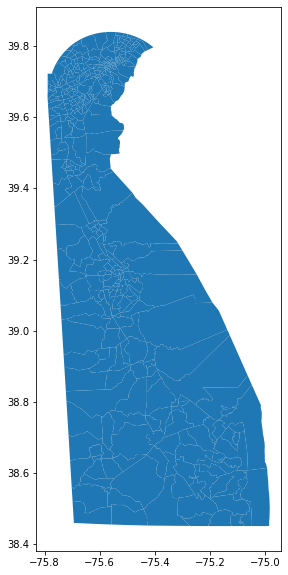

In [ ]:
de_elecp = gpd.read_file("https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson")
de_elecp.plot(figsize=(5,10))

In [ ]:
de_elecp

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746..."
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760..."
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686..."
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661..."
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658..."
...,...,...,...,...,...,...,...
425,426,424,08-38,2042,38,None,"POLYGON ((-75.12161 38.45119, -75.12186 38.451..."
426,427,425,08-40,1684,40,None,"POLYGON ((-75.43038 38.65207, -75.43017 38.651..."
427,428,426,08-41,2785,41,None,"POLYGON ((-75.36290 38.58543, -75.36268 38.585..."
428,429,427,09-20,414,20,None,"POLYGON ((-75.27245 38.80446, -75.27254 38.804..."


## read in turnout data - keep only election district, and votes


In [ ]:
import pandas as pd

In [ ]:
turnout = pd.read_csv("https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv")
turnout

,county,election_district,office,district,party,candidate,election_day,absentee,votes
0,New Castle,01-01,U.S. Senate,NaN,DEMOCRATIC,Carper T,552,29,581
1,New Castle,01-01,U.S. Senate,NaN,REPUBLICAN,Arlett R,50,1,51
2,New Castle,01-01,U.S. Senate,NaN,GREEN,Theodoropo,5,0,5
3,New Castle,01-01,U.S. Senate,NaN,LIBERTARIN,Frost N,4,2,6
4,New Castle,02-01,U.S. Senate,NaN,DEMOCRATIC,Carper T,903,34,937
...,...,...,...,...,...,...,...,...,...
4719,Sussex,07-41,State Assembly,41.0,REPUBLICAN,Collins R,523,22,545
4720,Sussex,08-41,State Assembly,41.0,DEMOCRATIC,Connor S B,180,11,191
4721,Sussex,08-41,State Assembly,41.0,REPUBLICAN,Collins R,327,8,335
4722,Sussex,Total,State Assembly,41.0,DEMOCRATIC,Connor S B,3172,216,3388


## group turnout data by election district and get the total number of data for that district

there are multiple entries for each geometry because there entries indicate the votes per candidate.


In [ ]:
turnout = turnout.groupby("election_district").count()
turnout.head()

,county,office,district,party,candidate,election_day,absentee,votes
election_district,,,,,,,,
01-01,9,9,1,9,9,9,9,9
01-02,10,10,2,10,10,10,10,10
01-03,10,10,2,10,10,10,10,10
01-04,9,9,1,9,9,9,9,9
01-05,9,9,1,9,9,9,9,9


## merge the turnout data with the electoral map


In [ ]:
de_elecmap = de_elecp.merge(turnout, left_on="EDRD_2012", right_on="election_district")
de_elecmap.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,county,office,district,party,candidate,election_day,absentee,votes
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",12,12,4,12,12,12,12,12
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",10,10,2,10,10,10,10,10
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",9,9,1,9,9,9,9,9
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",12,12,4,12,12,12,12,12
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",10,10,2,10,10,10,10,10


# make 3 maps: a coropleth of the population by electoral precinct, votes by precinct, and people density. 
Make sure you discuss patterns that appear, and that you consider the odd shape that delaware has in this map.... what is wrong with it? why does it not look like your usual maps of Delaware? how does this affect the descriptive analysis you just did? Make sure you choose appropriate colors maps and scheme to display the colors. Note that the last map may not be trivial to render. log10 function may be halpful (see notebook https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb but it is not required to use it) and also consider the individual values in the rows - are any of them unuaual? if there are consider dropping those values.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

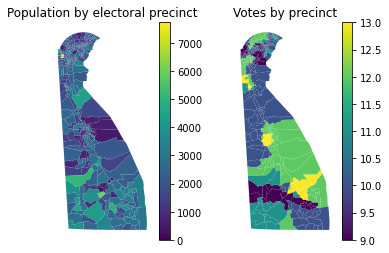

In [ ]:
# this is just an option for one of the plot. choose your esthetic and functionality as you see fit
fig = plt.figure()

ax = fig.add_subplot(121)
de_elecmap.plot(column="POPULATION", ax=ax, legend=True)
plt.title("Population by electoral precinct")
ax.axis('off');

ax = fig.add_subplot(122)
de_elecmap.plot(column="votes", ax=ax, legend=True)
plt.title("Votes by precinct")
ax.axis('off');

In [ ]:
de_elecmap["votes_pop"] = de_elecmap["votes"] / de_elecmap["POPULATION"]
de_elecmap["votes_pop"] = np.log10(de_elecmap.votes_pop)

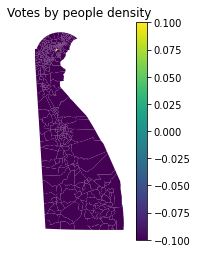

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121)
de_elecmap.plot(column="votes_pop", ax=ax, legend=True, vmax=0.1, vmin=-0.1)
plt.title("Votes by people density")
ax.axis('off');

# look at the variables' correlation

In [ ]:
import scipy as sp

In [ ]:
de_elecmap.corr()

,OBJECTID,ID,POPULATION,county,office,district,party,candidate,election_day,absentee,votes,votes_pop
OBJECTID,1.000000,0.991589,0.037839,0.257759,0.257759,0.257759,0.257759,0.257759,0.257759,0.257759,0.257759,0.082181
ID,0.991589,1.000000,0.036542,0.261585,0.261585,0.261585,0.261585,0.261585,0.261585,0.261585,0.261585,0.088342
POPULATION,0.037839,0.036542,1.000000,-0.016576,-0.016576,-0.016576,-0.016576,-0.016576,-0.016576,-0.016576,-0.016576,-0.865461
county,0.257759,0.261585,-0.016576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.178349
office,0.257759,0.261585,-0.016576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.178349
district,0.257759,0.261585,-0.016576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.178349
party,0.257759,0.261585,-0.016576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.178349
candidate,0.257759,0.261585,-0.016576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.178349
election_day,0.257759,0.261585,-0.016576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.178349
absentee,0.257759,0.261585,-0.016576,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.178349


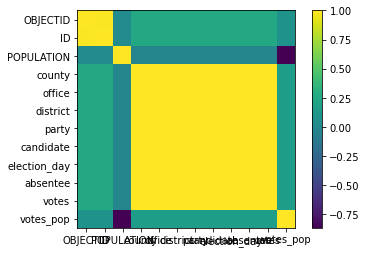

In [ ]:
#Correlation matrix - we will discuss this kind of plot soon
plt.imshow(de_elecmap.corr())
plt.xticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.yticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.colorbar();

# fit a line model to the data and a polynomial of second degree. 
You can use whatever package you want but if you use statsmodels you can get 
model diagnostics that will help you discuss the model

plot the model over the data

https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb


# extra credit: set up the problem as a machine leraning problem by splitting the sample into training and test data and evaluating the model on both sets.

This is in the notebook I shared, even if we did not get to talk about it in class https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

In [ ]:
import statsmodels.formula.api as smf
# note: if you clean the data differently or do split train and test the result will not be identical



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model1.summary()

NameError: ignored

In [ ]:
model2....

# Make an influence plot for each of the 2 models following the notebook in class. 
https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemo/linear_regression_in_detail.ipynb

Interpret it based on the slides and the notebook info
---



In [ ]:
...

# Compare the models with the Likelihood Ration test (follow example in class)


In [ ]:
...


# Discuss your model: what it means mathematically and what it means in practice

You must discuss the model on the basis of the model summary (R squared, adjusted R squared, p-values for the coefficients etc)

You must discuss the influence plot on the basis of the lecture discussion and of the reading

You must assess wheather the more complex model is better

# Extra Credit: Collect any other variable about Delaware that you think may be relevant to predit turn out and fit a line model using that as an exogenous variable.

You have a few options here: 
- dig for some other variable that is available at the electoral precinct level 
- get a variable at the county level , which means that the endogenous variable (votes) will be far more granular than the exogenous one... how would you deal with it?
- get a variable at a hith resolution geomeetry, such as census block or census tract, and merge the geometry. This is the hardest option. The Census bureau offers advise on conversion between geometries

Discuss your model: what it means mathematically and what it means in practice
